# Data Collection

I have downloaded the `wikihowAll.csv` from the [dataset repo](https://github.com/mahnazkoupaee/WikiHow-Dataset) and will be cleaning and parsing it with the following code.

In [1]:
import numpy as np
import os
import pandas as pd
import texthero as hero

In [6]:
raw_data = pd.read_csv('../wikihowAll.csv', delimiter=',')
raw_data.head()

,headline,title,text
0,"\nKeep related supplies in the same area.,\nMa...",How to Be an Organized Artist1,"If you're a photographer, keep all the necess..."
1,\nCreate a sketch in the NeoPopRealist manner ...,How to Create a Neopoprealist Art Work,See the image for how this drawing develops s...
2,"\nGet a bachelor’s degree.,\nEnroll in a studi...",How to Be a Visual Effects Artist1,It is possible to become a VFX artist without...
3,\nStart with some experience or interest in ar...,How to Become an Art Investor,The best art investors do their research on t...
4,"\nKeep your reference materials, sketches, art...",How to Be an Organized Artist2,"As you start planning for a project or work, ..."


In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215365 entries, 0 to 215364
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   headline  214547 non-null  object
 1   title     215364 non-null  object
 2   text      214294 non-null  object
dtypes: object(3)
memory usage: 4.9+ MB


## Data Pre-processing
From the info above, it seems that some entries are missing the text field. Looking at the data description below, we can see that the top `text` value is in fact an empty string, and there seem to be some duplicate values for headlines and text bodies.

In [9]:
raw_data.describe()

,headline,title,text
count,214547,215364,214294
unique,214096,215364,209178
top,"\nAcquire a pot.,\nGather the ingredients need...",How to Be an Organized Artist1,",,"
freq,11,1,524


This is confirmed by looking at the null counts in the dataset.

In [10]:
raw_data.isnull().sum()

headline     818
title          1
text        1071
dtype: int64

We will now remove any rows that are missing an entry and drop rows that contain duplicate `text` values so that all entries are from unique articles.

In [11]:
df = raw_data.copy()
df.dropna(inplace=True)
df.isnull().sum()

headline    0
title       0
text        0
dtype: int64

In [12]:
df.drop_duplicates(subset=['text'],inplace=True)
df.describe()

,headline,title,text
count,209178,209178,209178
unique,208821,209178,209178
top,"\nAcquire a pot.,\nGather the ingredients need...",How to Be an Organized Artist1,"If you're a photographer, keep all the necess..."
freq,11,1,1


Next, we will preprocess the text as done in [WikiHow-Dataset/process.py](https://github.com/mahnazkoupaee/WikiHow-Dataset/blob/master/process.py) to:
1. remove short articles with long summaries
2. remove extra commas in abstracts (headlines)
3. remove extra commas in articles (text)

In [13]:
df = df[df['headline'].str.len() < 0.75*df['text'].str.len()]
df['headline'].str.replace(".,", ".")
df['text'].replace(to_replace=r"[.]+[\n]+[,]", value=r".\n", regex=True)
df

/tmp/ipykernel_31/834079542.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['headline'].str.replace(".,", ".")


,headline,title,text
0,"\nKeep related supplies in the same area.,\nMa...",How to Be an Organized Artist1,"If you're a photographer, keep all the necess..."
1,\nCreate a sketch in the NeoPopRealist manner ...,How to Create a Neopoprealist Art Work,See the image for how this drawing develops s...
2,"\nGet a bachelor’s degree.,\nEnroll in a studi...",How to Be a Visual Effects Artist1,It is possible to become a VFX artist without...
3,\nStart with some experience or interest in ar...,How to Become an Art Investor,The best art investors do their research on t...
4,"\nKeep your reference materials, sketches, art...",How to Be an Organized Artist2,"As you start planning for a project or work, ..."
...,...,...,...
215360,\nConsider changing the spelling of your name....,How to Pick a Stage Name3,"If you have a name that you like, you might f..."
215361,"\nTry out your name.,\nDon’t legally change yo...",How to Pick a Stage Name4,Your name might sound great to you when you s...
215362,"\nUnderstand the process of relief printing.,\...",How to Identify Prints1,Relief printing is the oldest and most tradit...
215363,\nUnderstand the process of intaglio printing....,How to Identify Prints2,"Intaglio is Italian for ""incis­ing,"" and corr..."


## EDA 

Now, we will clean the data a little more using the TextHero packge and then perform some EDA on the data.

In [16]:
df['cleaned_text'] = hero.clean(df['text'])
df

,headline,title,text,cleaned_text
0,"\nKeep related supplies in the same area.,\nMa...",How to Be an Organized Artist1,"If you're a photographer, keep all the necess...",photographer keep necessary lens cords batteri...
1,\nCreate a sketch in the NeoPopRealist manner ...,How to Create a Neopoprealist Art Work,See the image for how this drawing develops s...,see image drawing develops step step however i...
2,"\nGet a bachelor’s degree.,\nEnroll in a studi...",How to Be a Visual Effects Artist1,It is possible to become a VFX artist without...,possible become vfx artist without college deg...
3,\nStart with some experience or interest in ar...,How to Become an Art Investor,The best art investors do their research on t...,best art investors research pieces art buy som...
4,"\nKeep your reference materials, sketches, art...",How to Be an Organized Artist2,"As you start planning for a project or work, ...",start planning project work likely gathering s...
...,...,...,...,...
215360,\nConsider changing the spelling of your name....,How to Pick a Stage Name3,"If you have a name that you like, you might f...",name like might fiddle spelling see alternate ...
215361,"\nTry out your name.,\nDon’t legally change yo...",How to Pick a Stage Name4,Your name might sound great to you when you s...,name might sound great say loud bedroom find s...
215362,"\nUnderstand the process of relief printing.,\...",How to Identify Prints1,Relief printing is the oldest and most tradit...,relief printing oldest traditional printing te...
215363,\nUnderstand the process of intaglio printing....,How to Identify Prints2,"Intaglio is Italian for ""incis­ing,"" and corr...",intaglio italian incising correspondingly revo...


In [19]:
df['cleaned_headline'] = hero.clean(df['headline'])

df.to_pickle("./cleaned.pkl")  

### Top Words in Dataset

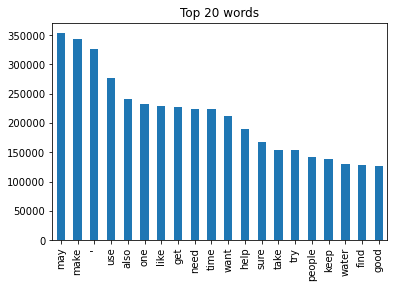

In [18]:
import matplotlib.pyplot as plt

NUM_TOP_WORDS = 20

top_20 = hero.visualization.top_words(df['cleaned_text']).head(NUM_TOP_WORDS)
top_20.plot.bar(rot=90, title="Top 20 words");
plt.show(block=True);

### Analyze word counts

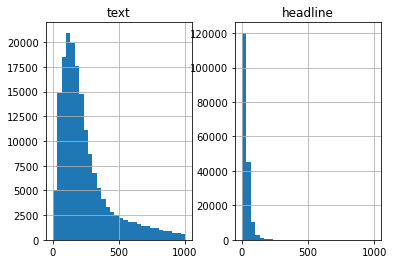

In [20]:
text_word_count = []
headline_word_count = []

for i in df['cleaned_text']:
    temp=i.split()
    text_word_count.append(len(temp))

for j in df['cleaned_headline']:
    temp1=j.split()
    headline_word_count.append(len(temp1))

length_df = pd.DataFrame({'text':text_word_count, 'headline':headline_word_count})
length_df.hist(bins = 30,range=[0,1000])
plt.show()

In [23]:
length_df.describe()

,text,headline
count,180027.000000,180027.00000
mean,266.509196,31.69919
std,255.678404,27.25677
min,2.000000,0.00000
25%,110.000000,15.00000
50%,186.000000,23.00000
75%,317.000000,41.00000
max,7087.000000,2731.00000


Taking a look at rows where cleaned text is less than 10 words

In [37]:
df.iloc[length_df[length_df['text'] < 10].index.values]

,headline,title,text,cleaned_text,cleaned_headline
5923,\nKeep your room clean.,How to Help Your Busy Mother Out Around the Ho...,"Keep track of your things, and put them away ...",keep track things put away done make mess clean,keep room clean
7801,"\nSmile.,\nPractice!,\nEat healthy.\n\n",How to Become a Better Cheerleader4,Look at the judges/coaches and have a positiv...,look judges coaches positive attitude train much,smile practice eat healthy
8235,\nMake sure you have some good guns.,How to Prepare Yourself for a Big Airsoft Battle1,This Article is meant as a guide for fields o...,article meant guide fields arenas intended use...,make sure good guns
9140,\nMake it look like this.,How to Cite Journal Articles5,"In practice, the APA reference list should lo...",practice apa reference list look like,make look like
9869,\nOutline.,How to Write an Effective Screenplay for a Sho...,Should be no longer than a couple of pages lo...,longer couple pages long write paragraph scene,outline
...,...,...,...,...,...
204049,\nGet your materials ready.,How to Make a Bow Ring Out of Clay1,"You will see them in the ""Things You'll Need""...",see things need section bought craft store,get materials ready
206371,\nDetermine if you fabric is woven or knitted.,How to Repair a Moth Hole1,Woven fabric has threads that are perpendicul...,woven fabric threads perpendicular knitted fab...,determine fabric woven knitted
208608,\nSqueeze both sides of your thighs together.,How to Become Flexible5,\n\n\nHold for 5 minutes. (If this is too long...,hold minutes long start minutes build,squeeze sides thighs together
213510,\nJam the string down between two pickups.,How to Get a Guitar to Sound Like a Screamer1,"Sometimes this works, sometimes this doesn't....",sometimes works sometimes interesting effect,jam string two pickups


These rows have a cleaned headline of length 0

In [38]:
df.iloc[length_df[length_df['headline'] == 0].index.values]

,headline,title,text,cleaned_text,cleaned_headline
6148,\nOwn up.,How to Get Rid of Your Dinner Without Your Par...,"If your parents find out, just say that you r...",parents find say really like food probably arg...,
40084,\nWhat it is.,How to Calculate Series and Parallel Resistance2,"Series resistance is simply connecting the ""o...",series resistance simply connecting side one r...,
40085,\nWhat it is.,How to Calculate Series and Parallel Resistance3,"Parallel resistance is when the ""in"" side of ...",parallel resistance side resistors connected s...,
40086,\nWhat it is.,How to Calculate Series and Parallel Resistance4,A combined network is any combination of seri...,combined network combination series parallel c...,
54482,"\n1.,\n2.,\n3.,\n4.,\n5.,\n6.,\n7.",How to Download World of Warcraft Addons,Download WoWMatrix (http://www.wowmatrix.com/...,download wowmatrix http www wowmatrix com open...,
67556,\nBe yourself.,How to Be Cool Without Being Bullied by Jealou...,Being yourself is trusting in your own worth ...,trusting worth afraid express let others see r...,
84907,\nA.,How to Solve Complex Cases of Quadratic Equati...,When a = 1 - Solving quadratic equations type...,solving quadratic equations types x2 bx c solv...,


### WordCloud
Plotting a wordcloud of the top 100 words

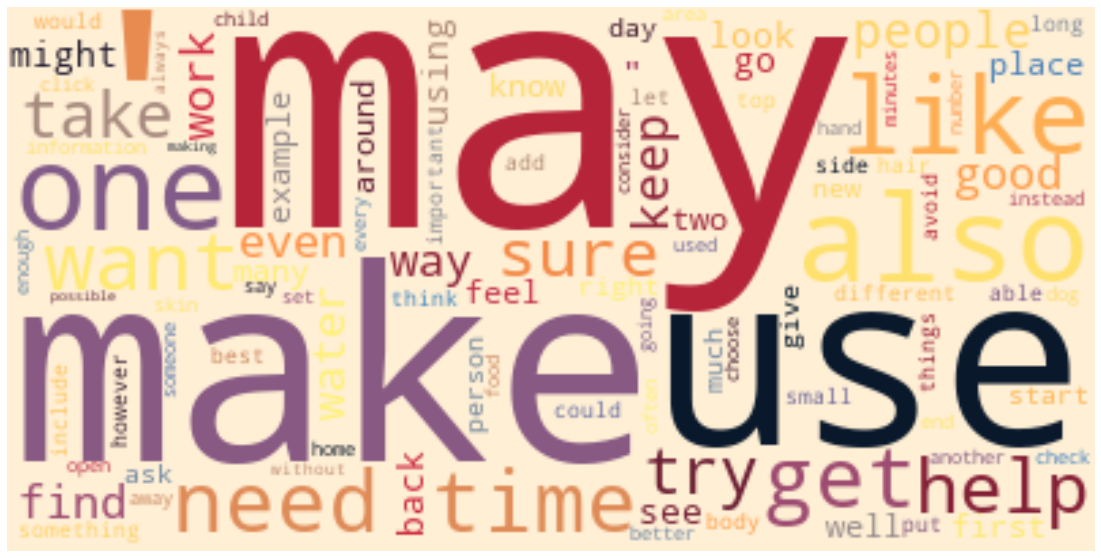

In [39]:
hero.wordcloud(df.cleaned_text, max_words=100,)